# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [29]:
setwd("/Users/david/Documents/GitHub_Repos/Dickman_DSPN_S22")
unclean <- read.csv("LexicalData_toclean.csv")
head(unclean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [38]:
library(tidyverse)
library(psych)

# (1) Getting rid of the commas in the reaction time values and making the variable numeric
unclean$D_RT_nocomma <- gsub(",","",unclean$D_RT)
unclean$D_RT_nocomma <- as.numeric(unclean$D_RT_nocomma)

# (2) Getting rid of rows where reaction times are missing
clean <- unclean %>% filter(!is.na(D_RT_nocomma))

# (3) Making sure all reaction times are positive
which(is.na(clean$D_RT_nocomma)) #no output - does this mean there are no NAs? I'll double check below:
testing.for.negatives <- clean %>% filter(D_RT_nocomma <0)
head(testing.for.negatives) #no negative values in reaction time


integer(0)

Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,D_RT_nocomma
<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

> *Each of the three actions above are addressing a data anomaly, as described by Muller.*
> * First action: Syntactical anomaly. More specifically, the categorical classification of the RT variable (when it should be numeric) WITH the addition of the commas (not a numerical opperator) represents both lexical and domain format errors. 
> * Second action: Coverage anomaly; A coverage anomaly refers to the presence of missing values or tuples. In this step, we remove any and all missing values in the D_RT variable
> * Third action: Semantic anomaly; A negative value in RT would represent an integrity constraint violation, as reaction times cannot naturally be less than 0.

---
## 3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [42]:
clean %>% summarise(n_Sub_ID = length(D_RT),
                    RT_mean = mean(D_RT_nocomma),
                    RT_sd = sd(D_RT_nocomma))

n_Sub_ID,RT_mean,RT_sd
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [44]:
clean <- clean %>% mutate(Trial_0 = Trial - 1)
head(clean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,D_RT_nocomma,Trial_0
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,710,0
2,67,1,1,"1,094",refrigerant,false,0.825,1094,0
3,120,1,1,587,gaining,false,-0.645,587,0
4,21,1,1,984,cheerless,false,0.025,984,0
5,236,1,1,577,pattered,false,-0.763,577,0
6,236,2,1,715,conjures,false,-0.364,715,1


---
## 4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

`geom_smooth()` using formula 'y ~ x'



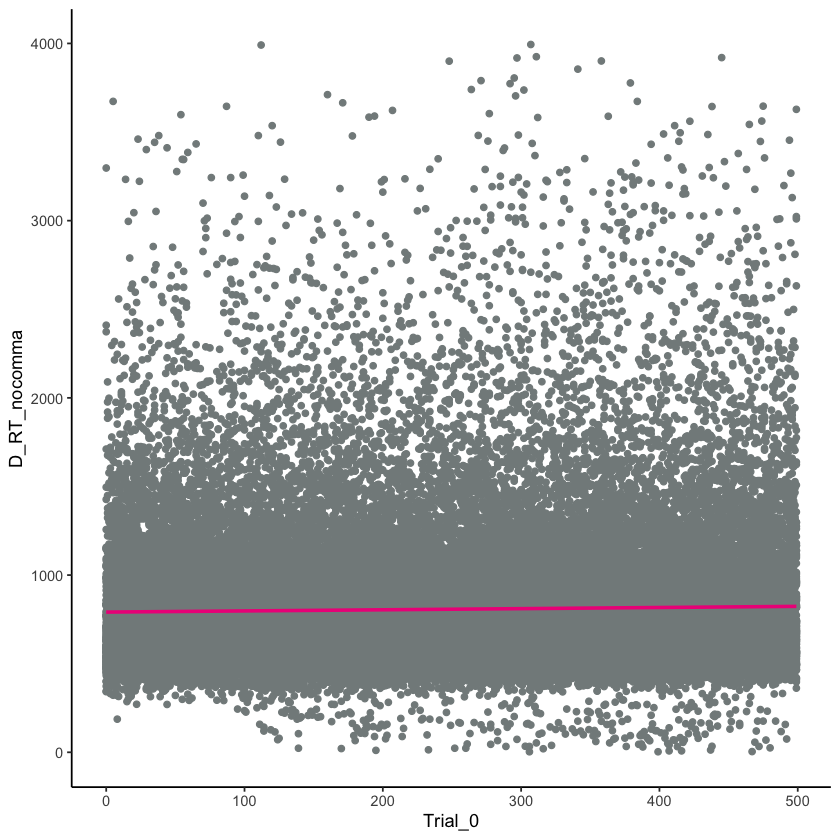

In [59]:
library(ggplot2)
plot <- ggplot(clean, aes(x=Trial_0, y=D_RT_nocomma)) + geom_point(colour="azure4") + geom_smooth(method = "lm", colour="deeppink2", se = TRUE) + theme_classic()
plot


That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 14, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Delainey Wescott (but we just compared output, the code is likely different)*